<a href="https://colab.research.google.com/github/Studwrestler/MLA_COH/blob/main/MLA4_COH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Chase Hall**  

## Standard Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [45]:
#example - you will replace this with the models you are actually using.
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


## Imports for Splitting Data and Building Pipeline


In [46]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [48]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [49]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [50]:
df=pd.read_csv('/content/gdrive/MyDrive/CS 430/Assignment 3/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [51]:
X = df.drop('forgery', axis=1)
y = df['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Building the Pipeline

In [52]:
pipeline=Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeClassifier())
])

### Executing the Model

In [53]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

### Evaluating Model

Precision score: 0.9611111111111111
F1 score 0.9774011299435028
Recall score: 0.9942528735632183


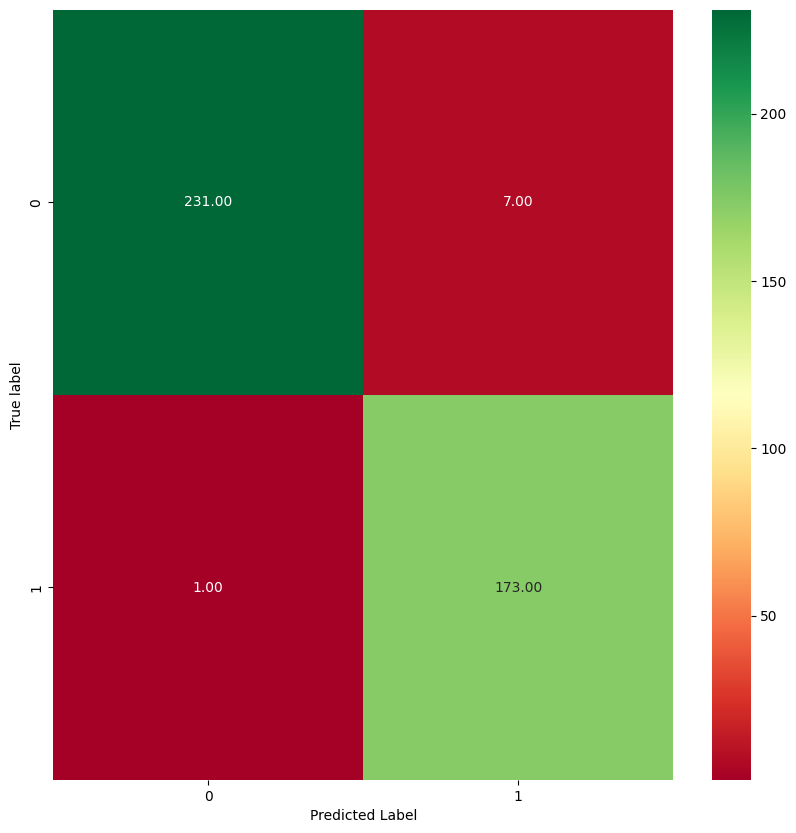

In [54]:
y_pred=pipeline.predict(X_test)
plot_cm(y_test, y_pred)
print('Precision score:', precision_score(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

### Conclusion
This model is good representation of the data because it did not let any forgeries through but it could be better because there is a couple forgeries predicted that werent.

## Problem 2

### Reading the Data

In [55]:
df=pd.read_csv('/content/gdrive/MyDrive/CS 430/Assignment 3/Steel_industry_data.csv')
new_column_names = {
    'Usage_kWh':'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor':'lag_current_pwr',
    'Leading_Current_Power_Factor':'lead_current_pwr',
    'NSM':'nsm',
    'WeekStatus':'week_status',
    'Day_of_week':'day_of_week',
    'Load_Type':'load_type'
}
df = df.rename(columns=new_column_names)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Splitting Data into Train/Test

In [56]:
X = df.drop('usage_kwh', axis=1)
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Building the Pipeline

In [57]:
categorical_features = ['week_status', 'day_of_week', 'load_type']
numerical_features = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])


### Executing the Model

In [58]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('model', DecisionTreeRegressor())])

### Evaluating Model

In [59]:
y_pred=pipeline.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MSE score:', mean_squared_error(y_test, y_pred))

R2 score: 0.9984055287677116
MSE score: 1.752000818112633


### Conclusion
I think this model represents the data decently because it has a high correlation but the MSE is pretty so there is probably better options out there